**Start**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
import random
!pip install -q keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Plant_1_Generation_Data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Plant_1_Weather_Sensor_Data.csv')

**Importing and verifying data**

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/solar_data.csv')

In [8]:
data

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.533840,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.145720
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.463280,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.714520
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.510160,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.245680
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.244720,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.065040
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.057520,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.895760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,29-04-2022 01:00,16.580318,43.276824,0.000000,49.674388,-0.243156,23.969398,25.226270,24.800780,24.674114,24.832156,2.833721,5.398601,15.298130
1005,29-04-2022 01:02,16.336292,42.395772,0.000000,348.423320,-0.344048,23.891640,25.166720,24.720160,24.610228,24.766238,2.840954,5.398601,15.337176
1006,29-04-2022 01:04,16.226494,42.390788,0.000000,43.298232,-0.446709,23.834920,25.131226,24.673068,24.576700,24.728590,2.841992,5.398601,15.342778
1007,29-04-2022 01:06,16.157694,43.270232,0.000000,218.255380,-0.496269,23.777128,25.095664,24.602908,24.529578,24.690848,2.839916,5.398421,15.331064


In [9]:
data.shape

(1009, 14)

In [10]:
data.info

<bound method DataFrame.info of              Timestamp   Air_Temp  Relative_Humidity  Wind_Speed  \
0     27-04-2022 15:32  43.349172          12.790256    0.533333   
1     27-04-2022 15:34  43.433980          11.468986    1.866667   
2     27-04-2022 15:36  43.286580          11.047298    2.866667   
3     27-04-2022 15:38  43.523020          12.058292    0.000000   
4     27-04-2022 15:40  43.728656          10.722330    2.266667   
...                ...        ...                ...         ...   
1004  29-04-2022 01:00  16.580318          43.276824    0.000000   
1005  29-04-2022 01:02  16.336292          42.395772    0.000000   
1006  29-04-2022 01:04  16.226494          42.390788    0.000000   
1007  29-04-2022 01:06  16.157694          43.270232    0.000000   
1008  29-04-2022 01:08  16.222518          44.301432    0.000000   

      Wind_Direction  Solar_Radiation       RTD_1      RTD_2      RTD_3  \
0         118.786620       707.533840   98.289640  94.283552  89.002824   
1

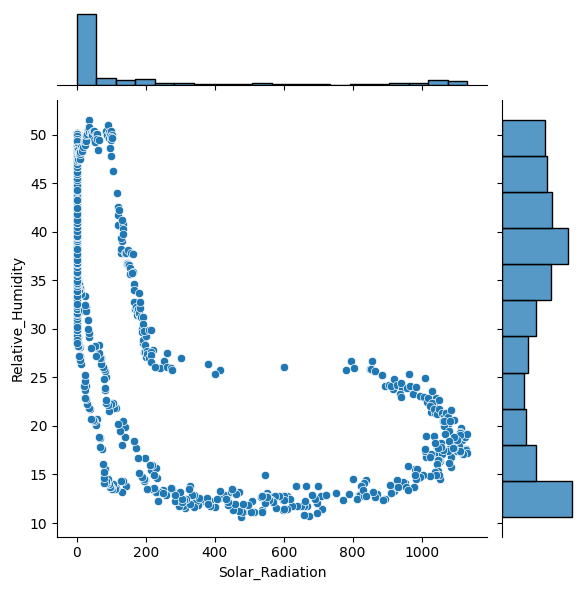

In [11]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data)

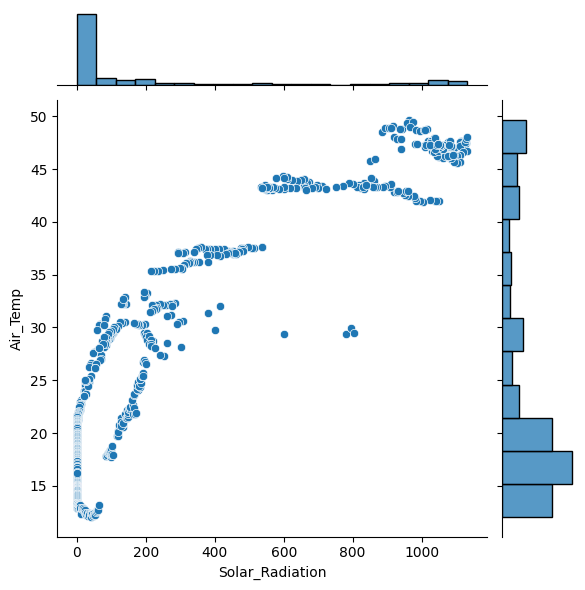

In [12]:
sns.jointplot(x='Solar_Radiation',y='Air_Temp',data = data)

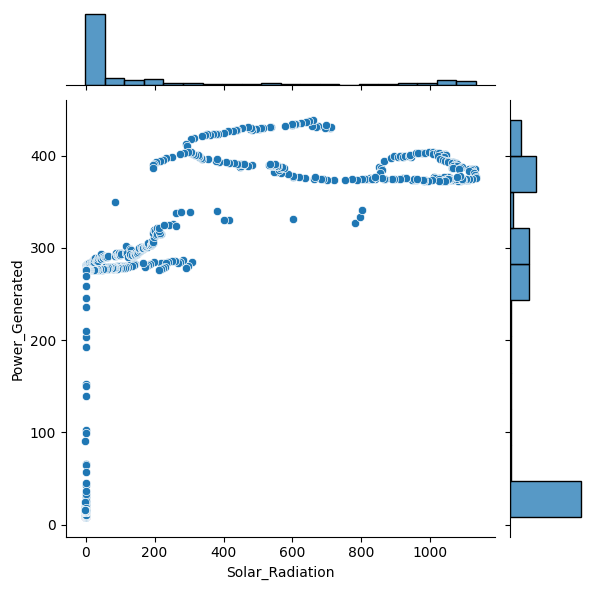

In [13]:
sns.jointplot(x='Solar_Radiation',y='Power_Generated',data = data,)

In [14]:
sns.pairplot(data, hue = 'Power_Generated')

Output hidden; open in https://colab.research.google.com to view.

In [15]:
w = data.pop('Timestamp')

**Scaling using Mean and Standard Deviation**

In [16]:
scaler = StandardScaler()
numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','Wind_Direction','Solar_Radiation','RTD_1','RTD_2','RTD_3','RTD_4','RTD_5','Array_Voltage','Array_Current','Power_Generated']
data[numericals]= scaler.fit_transform(data[numericals])

In [17]:
data.head(5)

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,1.574564,-1.543618,0.814157,-1.481229,1.352771,1.505487,1.497464,1.411373,1.461600,1.471676,1.486584,-1.019787,1.485977
1,1.581984,-1.650873,3.883984,-2.031127,1.360968,1.508074,1.494121,1.422203,1.470963,1.470572,1.489439,-0.957215,1.489400
2,1.569087,-1.685103,6.186353,-2.738537,1.319129,1.493074,1.479114,1.406209,1.450584,1.456315,1.486880,-0.986045,1.486579
3,1.589775,-1.603036,-0.413772,-2.326036,1.321185,1.599161,1.586953,1.507995,1.549679,1.565429,1.504315,-1.038847,1.503541
4,1.607768,-1.711483,4.804932,-3.362193,1.259106,1.604852,1.591419,1.508563,1.548570,1.571468,1.496976,-1.005105,1.496506


In [18]:
data = data.abs()
data.head(5)

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,1.574564,1.543618,0.814157,1.481229,1.352771,1.505487,1.497464,1.411373,1.461600,1.471676,1.486584,1.019787,1.485977
1,1.581984,1.650873,3.883984,2.031127,1.360968,1.508074,1.494121,1.422203,1.470963,1.470572,1.489439,0.957215,1.489400
2,1.569087,1.685103,6.186353,2.738537,1.319129,1.493074,1.479114,1.406209,1.450584,1.456315,1.486880,0.986045,1.486579
3,1.589775,1.603036,0.413772,2.326036,1.321185,1.599161,1.586953,1.507995,1.549679,1.565429,1.504315,1.038847,1.503541
4,1.607768,1.711483,4.804932,3.362193,1.259106,1.604852,1.591419,1.508563,1.548570,1.571468,1.496976,1.005105,1.496506


In [19]:
y = data.pop('Power_Generated')
x = data

In [20]:
x.isnull().sum()

Air_Temp             0
Relative_Humidity    0
Wind_Speed           0
Wind_Direction       0
Solar_Radiation      0
RTD_1                0
RTD_2                0
RTD_3                0
RTD_4                0
RTD_5                0
Array_Voltage        0
Array_Current        0
dtype: int64

In [21]:
x.shape

(1009, 12)

In [22]:
y.shape

(1009,)

**Split the data 80-20**

In [23]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(
#    x,y,random_state=104,test_size=0.2,shuffle=True)
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**LSTM data model** long short term model - Recurrent Neural Network

In [25]:
tf.random.set_seed(42)


model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.LSTM(300, activation='relu', return_sequences=True, input_shape=(12, 1)))
model1.add(tf.keras.layers.LSTM(200, activation='relu'))
model1.add(tf.keras.layers.Dense(50, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='relu'))

model1.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])
history1=model1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=25)

Epoch 1/25
26/26 [==============================] - 14s 127ms/step - loss: 2.7621 - mae: 2.7621
Epoch 2/25
26/26 [==============================] - 2s 90ms/step - loss: 0.2662 - mae: 0.2662
Epoch 3/25
26/26 [==============================] - 3s 100ms/step - loss: 0.2327 - mae: 0.2327
Epoch 4/25
26/26 [==============================] - 3s 106ms/step - loss: 0.2003 - mae: 0.2003
Epoch 5/25
26/26 [==============================] - 1s 50ms/step - loss: 0.1904 - mae: 0.1904
Epoch 6/25
26/26 [==============================] - 1s 51ms/step - loss: 0.1152 - mae: 0.1152
Epoch 7/25
26/26 [==============================] - 1s 50ms/step - loss: 0.1170 - mae: 0.1170
Epoch 8/25
26/26 [==============================] - 1s 50ms/step - loss: 0.1081 - mae: 0.1081
Epoch 9/25
26/26 [==============================] - 1s 48ms/step - loss: 0.0950 - mae: 0.0950
Epoch 10/25
26/26 [==============================] - 1s 52ms/step - loss: 0.0900 - mae: 0.0900
Epoch 11/25
26/26 [==============================] - 1s

Text(0.5, 0, 'epochs')

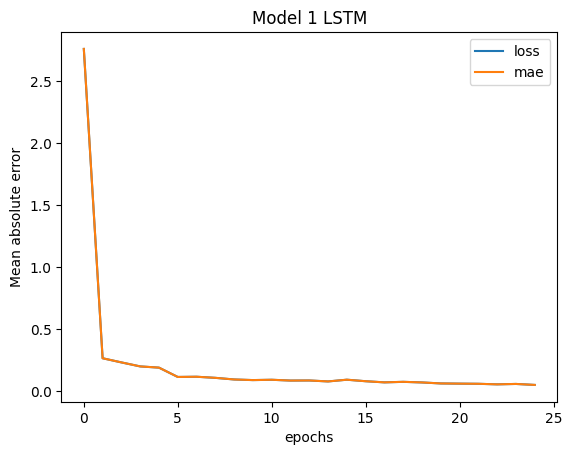

In [26]:
pd.DataFrame(history1.history).plot()
plt.title('Model 1 LSTM')
plt.ylabel('Mean absolute error')
plt.xlabel('epochs')

In [27]:
model1.evaluate(x_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0537 - mae: 0.0537


[0.05371053144335747, 0.05371053144335747]

**MODEL 2**

In [32]:
tf.random.set_seed(42)


model2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
history2=model2.fit(x_train,y_train,epochs = 20)

Epoch 1/20
26/26 [==============================] - 1s 4ms/step - loss: 0.4067 - mae: 0.4067
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3162 - mae: 0.3162
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 0.3104 - mae: 0.3104
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.2773 - mae: 0.2773
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2454 - mae: 0.2454
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2152 - mae: 0.2152
Epoch 7/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1911 - mae: 0.1911
Epoch 8/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1850 - mae: 0.1850
Epoch 9/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1842 - mae: 0.1842
Epoch 10/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1541 - mae: 0.1541
Epoch 11/20
26/26 [==============================] - 0s 5ms/step - lo

Text(0.5, 0, 'epochs')

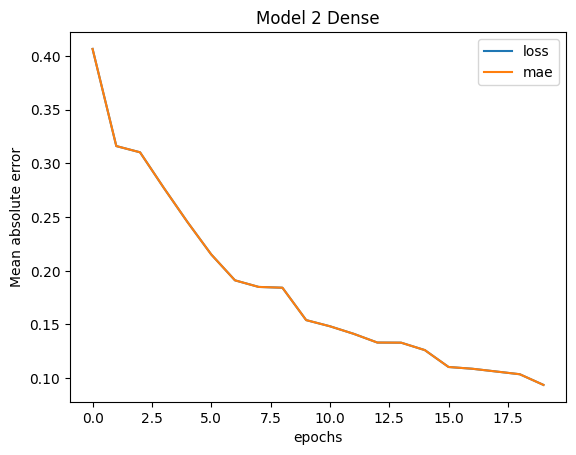

In [33]:
pd.DataFrame(history2.history).plot()
plt.title('Model 2 Dense')
plt.ylabel('Mean absolute error')
plt.xlabel('epochs')

In [34]:
model2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0487 - mae: 0.0487


[0.0486980676651001, 0.0486980676651001]

**MODEL 3**

In [35]:
model3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])
history3=model3.fit(x_train,y_train,epochs=20)

Epoch 1/20
26/26 [==============================] - 1s 6ms/step - loss: 0.2952 - mse: 0.1384
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2203 - mse: 0.0778
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2413 - mse: 0.0885
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.2209 - mse: 0.0748
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1953 - mse: 0.0576
Epoch 6/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1945 - mse: 0.0555
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.1789 - mse: 0.0519
Epoch 8/20
26/26 [==============================] - 0s 4ms/step - loss: 0.1640 - mse: 0.0407
Epoch 9/20
26/26 [==============================] - 0s 4ms/step - loss: 0.1490 - mse: 0.0339
Epoch 10/20
26/26 [==============================] - 0s 4ms/step - loss: 0.1393 - mse: 0.0295
Epoch 11/20
26/26 [==============================] - 0s 3ms/step - lo

Text(0.5, 0, 'epochs')

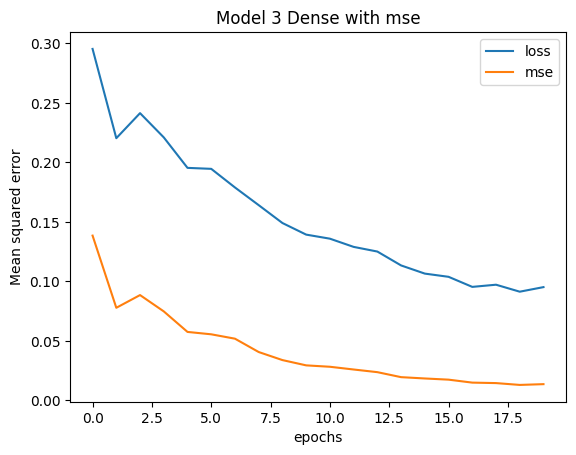

In [36]:
pd.DataFrame(history3.history).plot()
plt.title("Model 3 Dense with mse")
plt.ylabel("Mean squared error")
plt.xlabel("epochs")

In [37]:
model3.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0527 - mse: 0.0038


[0.05268830060958862, 0.0038300545420497656]

**MODEL 4, testing Naive Bayers**

In [49]:
xnew = [[43.48,10.859,0.933,262.86,657.94,101.488,97.446,91.770,96.053,97.02,80.6,5.362,435]]
xnew = scaler.transform(xnew)
xnew[0]
xnew = xnew[:,:-1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
print(xnew)

[[ 1.58601102 -1.7003886   1.73433812  0.84174957  1.21400914  1.59966282
   1.5975086   1.50168064  1.54675396  1.56144268  1.50019265 -1.17296075]]


In [54]:
# serialize model to JSON
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
